# **<font style="color:purple">Import needed libraries</font>**

In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import plotly.express as px #interactive visualization
import missingno as msno #visualization of missing values
from sklearn.preprocessing import LabelEncoder #encoding categorical data
from sklearn.model_selection import train_test_split #splitting data into training and testing set
from sklearn.metrics import confusion_matrix, classification_report  #evaluation
from sklearn.dummy import DummyClassifier #basline approach

In [107]:
#read metadata file into dataframe

metadata_df = pd.read_csv("F:\\Trainings\\IEEE Competition\\New folder\\metadata.csv" ,sep=';')

metadata_df

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,NaN,no
1,Application mode,Feature,Integer,NaN,1 - 1st phase - general contingent 2 - Ordinan...,NaN,no
2,Application order,Feature,Integer,NaN,Application order (between 0 - first choice; a...,NaN,no
3,Course,Feature,Integer,NaN,33 - Biofuel Production Technologies 171 - Ani...,NaN,no
4,Daytime/evening attendance,Feature,Integer,NaN,1 – daytime 0 - evening,NaN,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,NaN,no
6,Previous qualification (grade),Feature,Continuous,NaN,Grade of previous qualification (between 0 and...,NaN,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,NaN,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no


In [108]:
#read train file into dataframe

df_train = pd.read_csv("F:\\Trainings\\IEEE Competition\\New folder\\train.csv" ,sep=';')

# Clean up the column names
df_train.columns = df_train.columns.str.replace('"', ' ')  # Remove quotes
df_train.columns = df_train.columns.str.replace('\t', ' ')  # Remove tabs
df_train.columns = df_train.columns.str.strip()  # Remove leading and trailing whitespaces

#retrieve a sample
df_train.sample(10)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2876,1,39,1,9556,1,1,133.1,6,3,3,...,0,5,10,0,0.000000,0,12.4,0.5,1.79,Dropout
3317,1,1,1,171,1,1,172.0,1,1,1,...,0,0,0,0,0.000000,0,16.2,0.3,-0.92,Graduate
2605,2,44,1,9085,1,39,160.0,1,37,37,...,0,5,8,5,12.000000,1,9.4,-0.8,-3.12,Graduate
1030,1,1,2,9147,1,1,132.0,1,1,19,...,0,5,12,3,10.500000,0,13.9,-0.3,0.79,Graduate
1715,1,17,2,9500,1,1,135.0,1,1,19,...,0,8,8,8,13.342500,0,9.4,-0.8,-3.12,Graduate
3388,1,1,4,171,1,1,146.0,1,1,1,...,4,11,16,11,13.250000,0,8.9,1.4,3.51,Graduate
169,1,43,1,9238,1,1,125.0,1,19,19,...,0,6,12,2,11.333333,0,16.2,0.3,-0.92,Dropout
998,1,17,1,9254,1,1,115.0,1,1,19,...,0,6,8,5,13.400000,0,11.1,0.6,2.02,Graduate
1299,1,18,1,9254,1,1,118.0,1,38,38,...,0,6,11,3,12.000000,0,9.4,-0.8,-3.12,Enrolled
2383,1,53,1,9003,1,1,130.0,1,19,1,...,5,12,15,9,11.444444,0,8.9,1.4,3.51,Enrolled


In [109]:
#read test file into dataframe

df_test = pd.read_csv("F:\\Trainings\\IEEE Competition\\New folder\\test.csv" ,sep=';')

# Clean up the column names
df_test.columns = df_test.columns.str.replace('"', ' ')  # Remove quotes
df_test.columns = df_test.columns.str.replace('\t', ' ')  # Remove tabs
df_test.columns = df_test.columns.str.strip()  # Remove leading and trailing whitespaces

#retrieve a sample
df_test.sample(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
430,1,1,1,9070,1,1,131.0,1,37,37,...,0,0,6,7,5,13.800000,0,12.7,3.7,-1.70
347,1,1,1,9238,1,1,108.0,1,19,38,...,0,0,6,11,4,10.750000,0,12.4,0.5,1.79
4,1,39,1,9991,0,12,133.1,1,37,37,...,0,0,5,9,3,11.333333,1,7.6,2.6,0.32
864,2,39,1,9130,1,19,133.1,1,2,1,...,0,0,6,9,2,10.500000,0,16.2,0.3,-0.92
495,2,7,1,9130,1,2,110.0,1,19,19,...,0,0,6,6,0,0.000000,0,16.2,0.3,-0.92
643,1,1,1,9085,1,1,145.0,1,38,38,...,1,0,5,6,5,14.000000,0,12.7,3.7,-1.70
536,1,1,3,9500,1,1,145.0,1,19,38,...,0,0,8,8,7,13.971429,0,12.7,3.7,-1.70
576,1,1,1,9085,1,1,145.0,1,38,37,...,0,0,6,8,6,12.500000,0,8.9,1.4,3.51
540,1,1,1,171,1,1,140.0,1,37,37,...,0,0,0,0,0,0.000000,0,12.7,3.7,-1.70
210,1,17,2,9500,1,1,130.0,1,38,38,...,0,0,8,8,7,13.937143,0,10.8,1.4,1.74


# **<font style="color:purple">Exploratory Data Analysis</font>**
### **<font style="color:purple">Univariate Analysis</font>**
### **<font style="color:purple">Bivariate Analysis</font>**
### **<font style="color:purple">Multi Variate Analysis</font>**

In [110]:
#corr and chi square
#scatter plot between each feature and target
#Lets implement a scatter plot for each variable to understand the behavior with the target

# fig = plt.figure(figsize=(14, 20))


# Acceptance = df_eval.poutcome
# for i in range(len(df_eval.columns)): 
#     fig.add_subplot(10,5,i+1)
#     sns.scatterplot(x=df_eval.iloc[:,i], y=Acceptance)
    

# plt.tight_layout()
# plt.show()

In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3540 non-null   int64  
 1   Application mode                                3540 non-null   int64  
 2   Application order                               3540 non-null   int64  
 3   Course                                          3540 non-null   int64  
 4   Daytime/evening attendance                      3540 non-null   int64  
 5   Previous qualification                          3540 non-null   int64  
 6   Previous qualification (grade)                  3540 non-null   float64
 7   Nacionality                                     3540 non-null   int64  
 8   Mother's qualification                          3540 non-null   int64  
 9   Father's qualification                   

In [112]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,3540.0,1.173729,0.589576,1.00,1.00,1.000000,1.000000,6.000000
Application mode,3540.0,18.673729,17.488737,1.00,1.00,17.000000,39.000000,57.000000
Application order,3540.0,1.732486,1.317140,0.00,1.00,1.000000,2.000000,9.000000
Course,3540.0,8858.282768,2060.697591,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,3540.0,0.889831,0.313145,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,3540.0,4.483898,10.101101,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),3540.0,132.445621,13.232719,95.00,124.00,133.000000,140.000000,190.000000
Nacionality,3540.0,1.853107,6.802913,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,3540.0,19.180226,15.567580,1.00,2.00,19.000000,37.000000,43.000000
Father's qualification,3540.0,21.976836,15.402595,1.00,3.00,19.000000,37.000000,43.000000


In [113]:
df_train['Target'].value_counts()

Target
Graduate    1786
Dropout     1116
Enrolled     638
Name: count, dtype: int64

In [114]:
# Add visualization from first Notebook

# **<font style="color:purple">Data quality ensuring and Cleaning</font>**

- check for missing values
- check for duplicate values
- check outliers
- handle categorical data
- handle skewness
- data scaling


### **<font style="color:green">Check for missing values</font>**


In [115]:
#check null
df_train.isnull()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3536,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3538,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [116]:
df_train.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [117]:
print(f"Total number of missing values : " ,df_train.isnull().sum().sum())

Total number of missing values :  0


In [118]:
#check NaN or None
df_train.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [119]:
print(f"Total number of Not A Number values : " ,df_train.isna().sum().sum())

Total number of Not A Number values :  0


In [120]:
df_train.isna().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [121]:
df_train.isna().any().sum()

0

<Axes: >

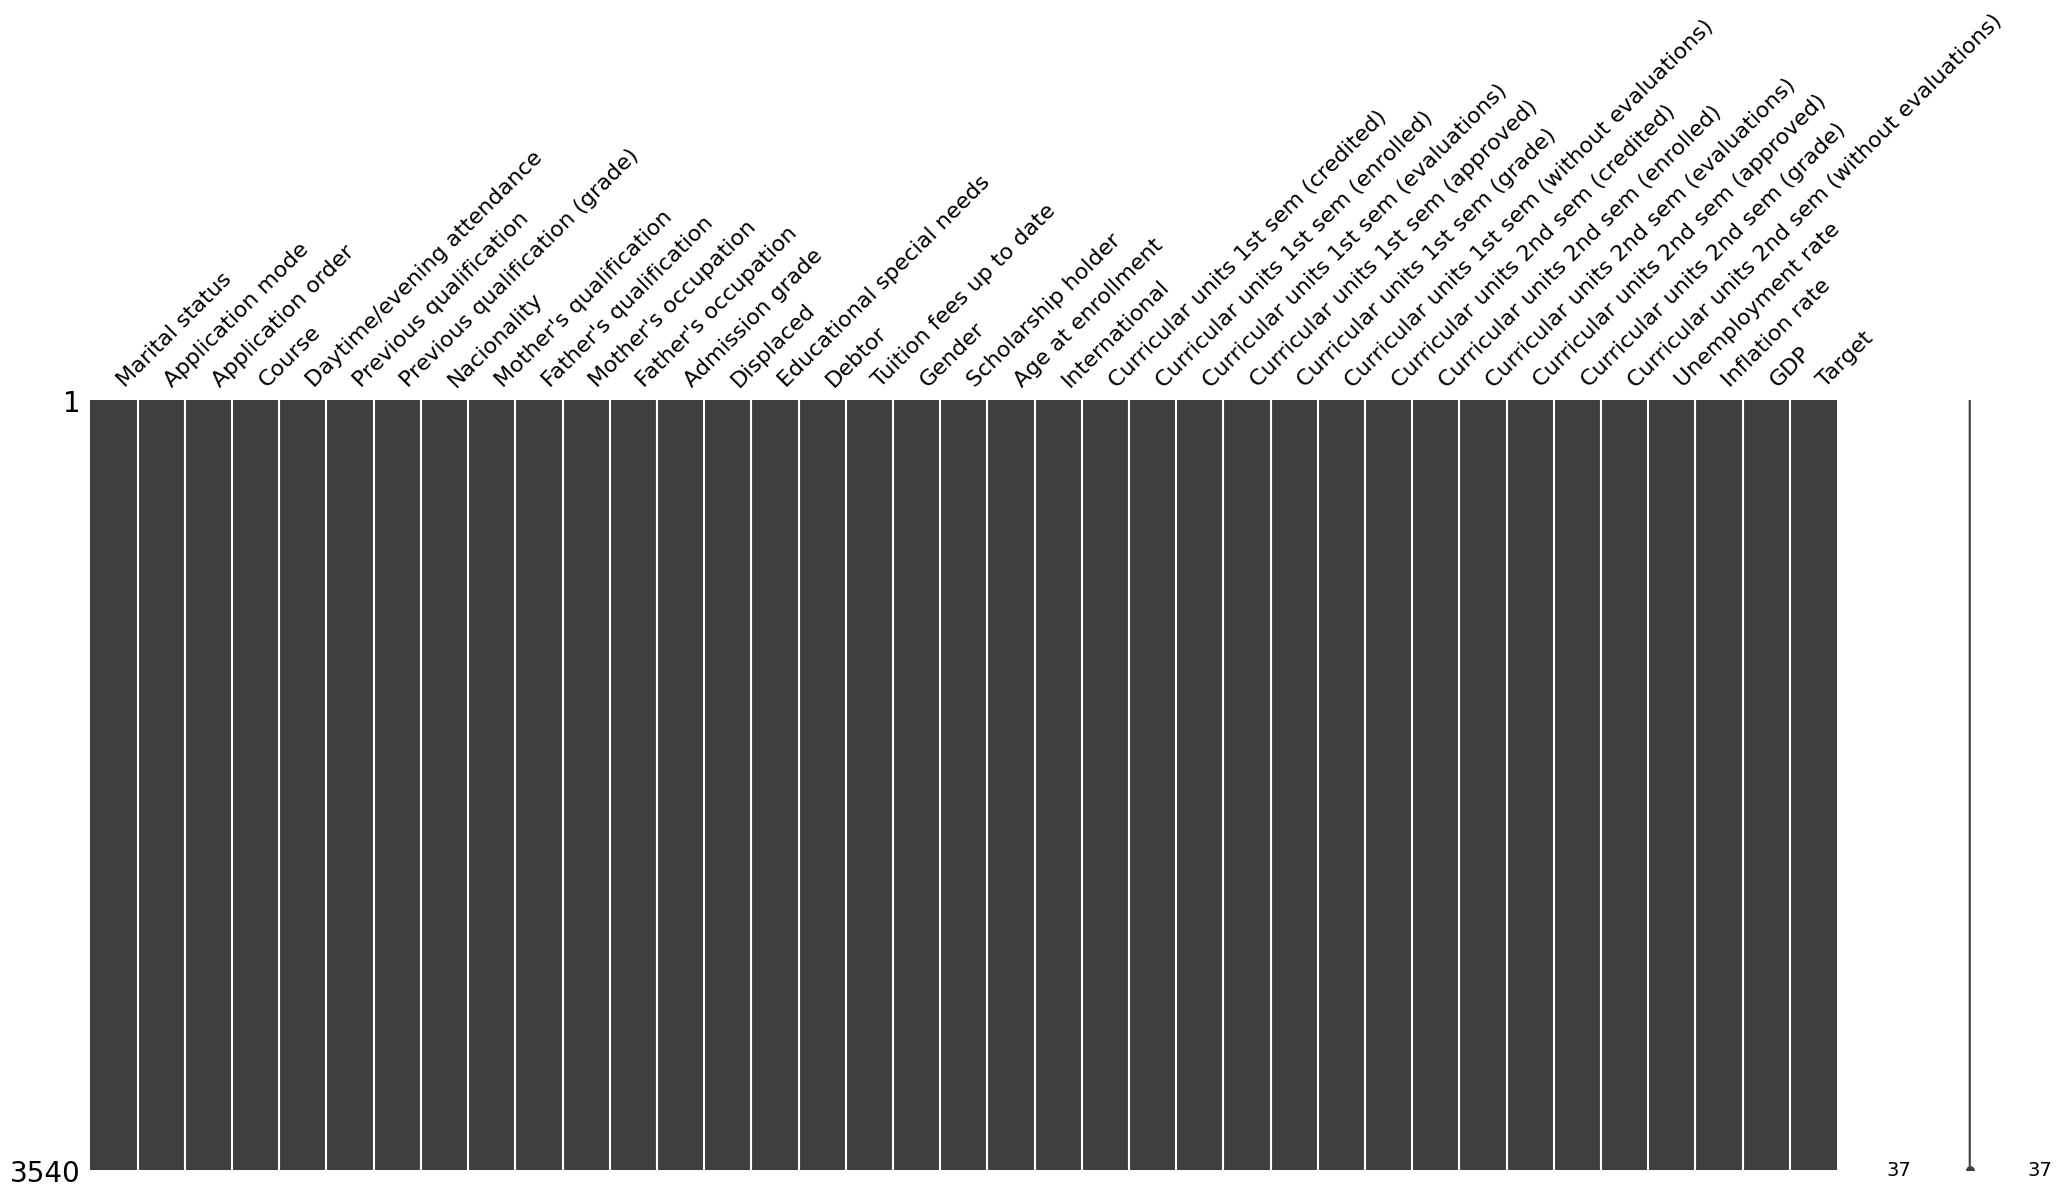

In [122]:
#visualization of missing values in a Pandas DataFrame  
import missingno as msno  
msno.matrix(df_train)

### **<font style="color:green">Check for duplicate values</font>**

In [123]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3535    False
3536    False
3537    False
3538    False
3539    False
Length: 3540, dtype: bool

In [124]:
print(f"Total number of duplicated values : " ,df_train.duplicated().sum())

Total number of duplicated values :  0


### **<font style="color:green">Check outliers</font>**

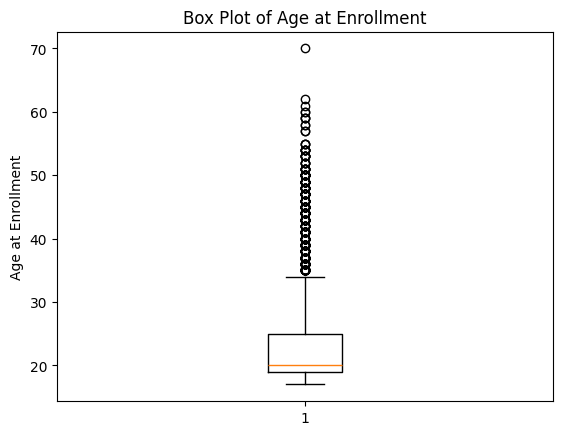

In [125]:
#Visualize box plot for continuous variables
#use boxplot
plt.boxplot(df_train['Age at enrollment'])
plt.title('Box Plot of Age at Enrollment')
plt.ylabel('Age at Enrollment')
plt.show()

In [126]:
low, high = df_train['Age at enrollment'].quantile(0.01), df_train['Age at enrollment'].quantile(0.97)
mask = df_train['Age at enrollment'].between(low, high)
df_train = df_train[mask]
df_train.shape

(3432, 37)

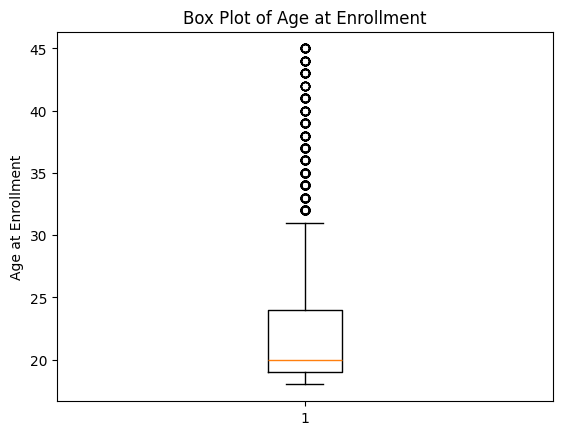

In [127]:
plt.boxplot(df_train['Age at enrollment'])
plt.title('Box Plot of Age at Enrollment')
plt.ylabel('Age at Enrollment')
plt.show()

### **<font style="color:green">Handle categorical data</font>**

In [128]:
df_train.shape

(3432, 37)

In [129]:
train_original = df_train.copy()
test_original = df_test.copy()

In [130]:
#apply one hot encoding to 'Application mode' column in df_train datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_mode = le.fit_transform(df_train['Application mode'])

In [131]:
#convert onehot_Labels into dataframe
x_df = pd.DataFrame(onehot_mode)
x_df.columns = ['Application mode']
x_df

,Application mode
0,7
1,5
2,0
3,7
4,10
...,...
3427,14
3428,10
3429,10
3430,7


In [132]:
x_df.value_counts()

Application mode
0                   1360
7                    701
10                   562
12                   219
13                   161
3                    104
8                     96
11                    64
14                    51
6                     34
15                    33
5                     24
2                     11
4                      9
1                      1
9                      1
16                     1
Name: count, dtype: int64

In [133]:
#edit df_train dataframe after one hot encoding
df_train['Application mode']=onehot_mode
df_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,7,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,5,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,0,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,7,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,10,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,1,14,1,9991,0,39,120.0,1,1,4,...,9,13,13,9,11.333333,0,8.9,1.4,3.51,Dropout
3536,1,10,1,9991,0,1,110.0,1,37,37,...,0,5,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
3537,1,10,2,9147,1,19,133.1,1,38,19,...,0,5,9,0,0.000000,0,10.8,1.4,1.74,Dropout
3538,1,7,5,9254,1,1,118.0,1,19,37,...,0,6,12,4,10.250000,0,7.6,2.6,0.32,Dropout


In [134]:
#To see mapping

unique_values = np.unique(onehot_mode)

original_modes = le.inverse_transform(unique_values)

# Print the mapping
for value, mode in zip(unique_values, original_modes):
    print(f'{value}: {mode}')

0: 1
1: 2
2: 5
3: 7
4: 10
5: 15
6: 16
7: 17
8: 18
9: 26
10: 39
11: 42
12: 43
13: 44
14: 51
15: 53
16: 57


In [135]:
#apply one hot encoding to 'Course' column in df_train datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_course = le.fit_transform(df_train['Course'])

#edit df_train dataframe after one hot encoding
df_train['Course']=onehot_course


In [136]:
#To see mapping
unique_values = np.unique(onehot_course)

original_course = le.inverse_transform(unique_values)

# Print the mapping
for value, course in zip(unique_values, original_course):
    print(f'{value}: {course}')

0: 33
1: 171
2: 8014
3: 9003
4: 9070
5: 9085
6: 9119
7: 9130
8: 9147
9: 9238
10: 9254
11: 9500
12: 9556
13: 9670
14: 9773
15: 9853
16: 9991


In [137]:
df_train['Course'].value_counts().sum()

3432

In [138]:
#apply one hot encoding to 'Nacionality' column in df_train datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_Nacionality = le.fit_transform(df_train['Nacionality'])

#edit df_train dataframe after one hot encoding
df_train['Nacionality']=onehot_Nacionality

In [139]:
#To see mapping

unique_values = np.unique(onehot_Nacionality)

original_Nacionality = le.inverse_transform(unique_values)

# Print the mapping
for value, Nacionality in zip(unique_values, original_Nacionality):
    print(f'{value}: {Nacionality}')

0: 1
1: 2
2: 6
3: 11
4: 13
5: 21
6: 22
7: 24
8: 25
9: 26
10: 32
11: 41
12: 62
13: 100
14: 101
15: 103
16: 105
17: 108
18: 109


In [140]:
df_train['Nacionality'].value_counts().sum()

3432

In [141]:
#apply one hot encoding to "Mother's occupation" column in df_train datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_MOcc = le.fit_transform(df_train["Mother's occupation"])

#edit df_train dataframe after one hot encoding
df_train["Mother's occupation"]=onehot_MOcc

In [142]:
df_train["Mother's occupation"].value_counts().sum()

3432

In [143]:
#To see mapping

unique_values = np.unique(onehot_MOcc)

original_MOcc = le.inverse_transform(unique_values)

# Print the mapping
for value, MOcc in zip(unique_values, original_MOcc):
    print(f'{value}: {MOcc}')

0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 90
12: 99
13: 122
14: 123
15: 125
16: 131
17: 132
18: 134
19: 141
20: 143
21: 144
22: 151
23: 152
24: 153
25: 171
26: 173
27: 175
28: 191
29: 192
30: 193
31: 194


In [144]:
#apply one hot encoding to "Father's occupation" column in df_train datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_FOcc = le.fit_transform(df_train["Father's occupation"])

#edit df_train dataframe after one hot encoding
df_train["Father's occupation"]=onehot_FOcc

In [145]:
df_train["Father's occupation"].value_counts().sum()

3432

In [146]:
#To see mapping

unique_values = np.unique(onehot_FOcc)

original_FOcc = le.inverse_transform(unique_values)

# Print the mapping
for value, FOcc in zip(unique_values, original_FOcc):
    print(f'{value}: {FOcc}')

0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 90
12: 99
13: 102
14: 103
15: 112
16: 121
17: 123
18: 124
19: 131
20: 132
21: 134
22: 135
23: 143
24: 144
25: 151
26: 152
27: 153
28: 161
29: 163
30: 171
31: 172
32: 174
33: 175
34: 181
35: 182
36: 183
37: 192
38: 193
39: 194
40: 195


In [147]:
#apply one hot encoding to 'Target' column in df_train datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_target = le.fit_transform(df_train['Target'])

#edit df_train dataframe after one hot encoding
df_train['Target']=onehot_target

In [148]:
df_train['Target'].value_counts().sum()

3432

In [149]:
#To see mapping
unique_values = np.unique(onehot_target)
original_target = le.inverse_transform(unique_values)
# Print the mapping
for value, target in zip(unique_values, original_target):
    print(f'{value}: {target}')

0: Dropout
1: Enrolled
2: Graduate


In [150]:
df_train.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,7,5,1,1,1,122.0,0,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,5,1,10,1,1,160.0,0,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,0,5,4,1,1,122.0,0,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,7,2,14,1,1,122.0,0,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,10,1,2,0,1,100.0,0,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
6,1,0,1,11,1,1,142.0,0,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,2
7,1,8,4,10,1,1,119.0,0,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,0,3,9,1,1,137.0,12,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,2
9,1,0,1,9,1,1,138.0,0,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0
10,1,0,1,13,1,1,139.0,0,38,19,...,0,6,7,5,14.200000,0,13.9,-0.3,0.79,2


### **Don't forget to encode same columns in test data**

In [151]:
df_test.shape

(884, 36)

In [152]:
#apply one hot encoding to 'Application mode' column in df_test datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_mode = le.fit_transform(df_test['Application mode'])

#edit Input_data dataframe after one hot encoding
df_test['Application mode']=onehot_mode

In [153]:
df_test['Application mode'].value_counts().sum()

884

In [154]:
#apply one hot encoding to 'Course' column in df_test datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_course = le.fit_transform(df_test['Course'])

#edit Input_data dataframe after one hot encoding
df_test['Course']=onehot_course

In [155]:
df_test['Course'].value_counts().sum()

884

In [156]:
#apply one hot encoding to 'Nacionality' column in df_test datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_Nacionality = le.fit_transform(df_test['Nacionality'])

#edit Input_data dataframe after one hot encoding
df_test['Nacionality']=onehot_Nacionality

In [157]:
df_test['Nacionality'].value_counts().sum()

884

In [158]:
#apply one hot encoding to "Mother's occupation" column in df_test datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_MOcc = le.fit_transform(df_test["Mother's occupation"])

#edit Input_data dataframe after one hot encoding
df_test["Mother's occupation"]=onehot_MOcc

In [159]:
df_test["Mother's occupation"].value_counts().sum()

884

In [160]:
#apply one hot encoding to "Father's occupation" column in df_test datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_FOcc = le.fit_transform(df_test["Father's occupation"])

#edit Input_data dataframe after one hot encoding
df_test["Father's occupation"]=onehot_FOcc

In [161]:
df_test["Father's occupation"].value_counts().sum()

884

### **<font style="color:green">Skewness</font>**

In [162]:
# Calculate skewness for each column
for column in df_train.columns:
    skewness_per_column = df_train[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for Marital status: 4.889586041773643
Skewness for Application mode: 0.10501534197335388
Skewness for Application order: 1.8330465891410406
Skewness for Course: -0.2112219578065423
Skewness for Daytime/evening attendance: -2.658149890540946
Skewness for Previous qualification: 2.979523776721388
Skewness for Previous qualification (grade): 0.3352550101910028
Skewness for Nacionality: 7.5012206567172
Skewness for Mother's qualification: 0.08910706533853345
Skewness for Father's qualification: -0.23197733646918312
Skewness for Mother's occupation: 2.336720082958377
Skewness for Father's occupation: 3.433889739073674
Skewness for Admission grade: 0.5623372179849951
Skewness for Displaced: -0.2146037982214195
Skewness for Educational special needs: 8.768913842125626
Skewness for Debtor: 2.4728290992628583
Skewness for Tuition fees up to date: -2.4132468505549416
Skewness for Gender: 0.6619834545022915
Skewness for Scholarship holder: 1.1302749322847714
Skewness for Age at enrollmen

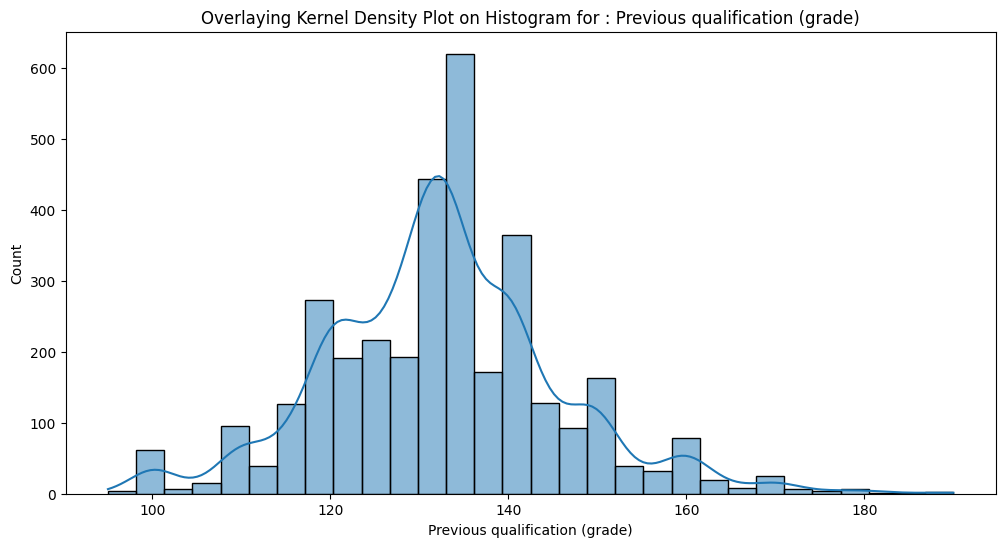

In [163]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train["Previous qualification (grade)"], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Previous qualification (grade)")
plt.show()

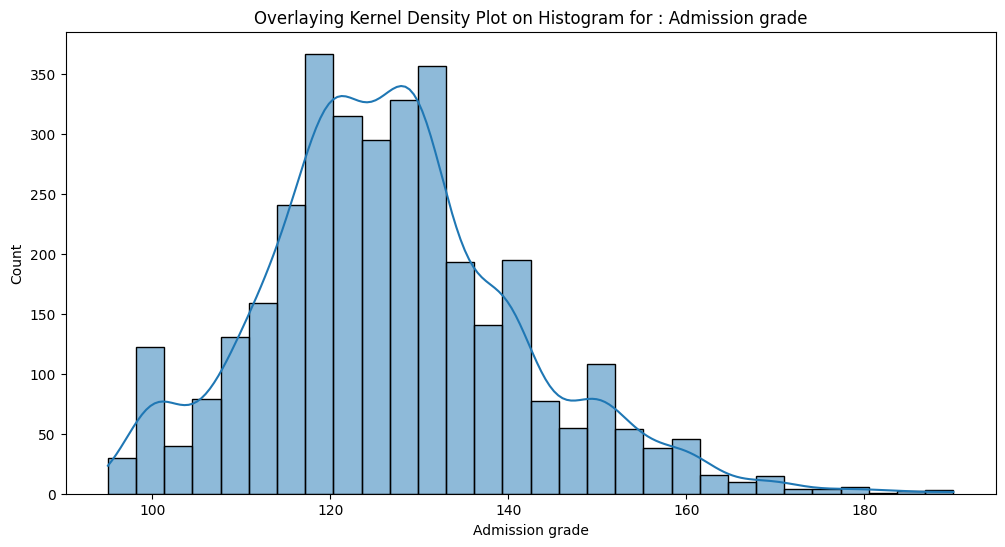

In [164]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Admission grade'], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Admission grade")
plt.show()

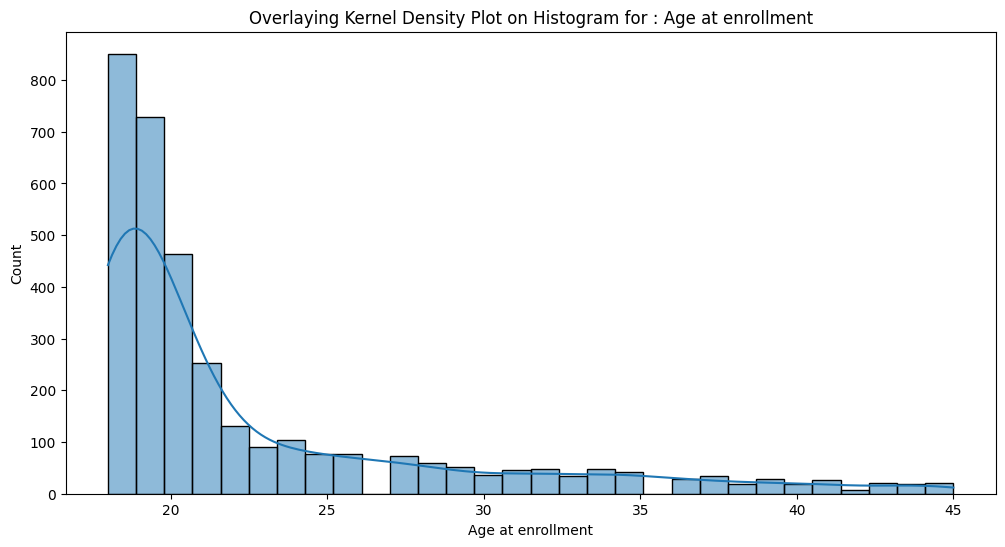

In [165]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train["Age at enrollment"], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Age at enrollment")
plt.show()

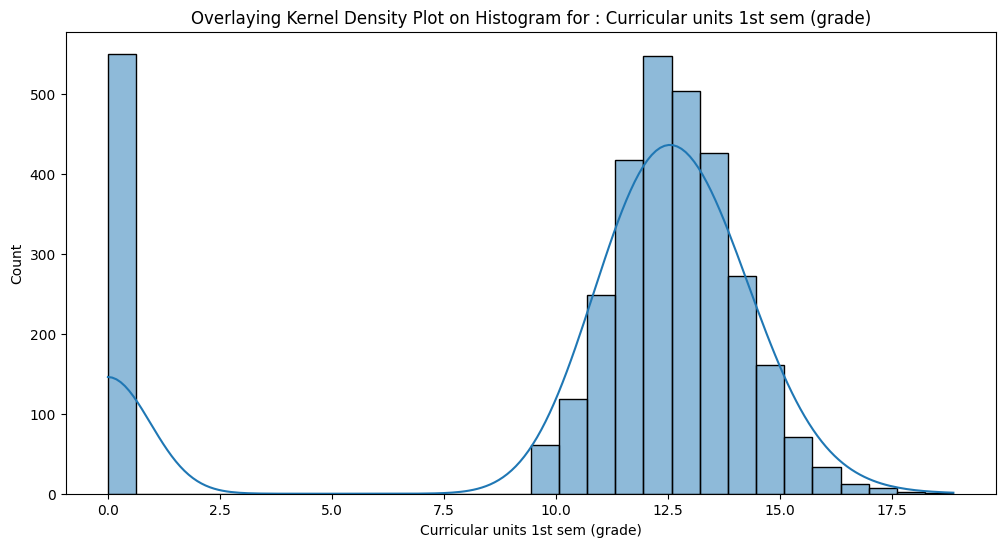

In [166]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Curricular units 1st sem (grade)'], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Curricular units 1st sem (grade)")
plt.show()

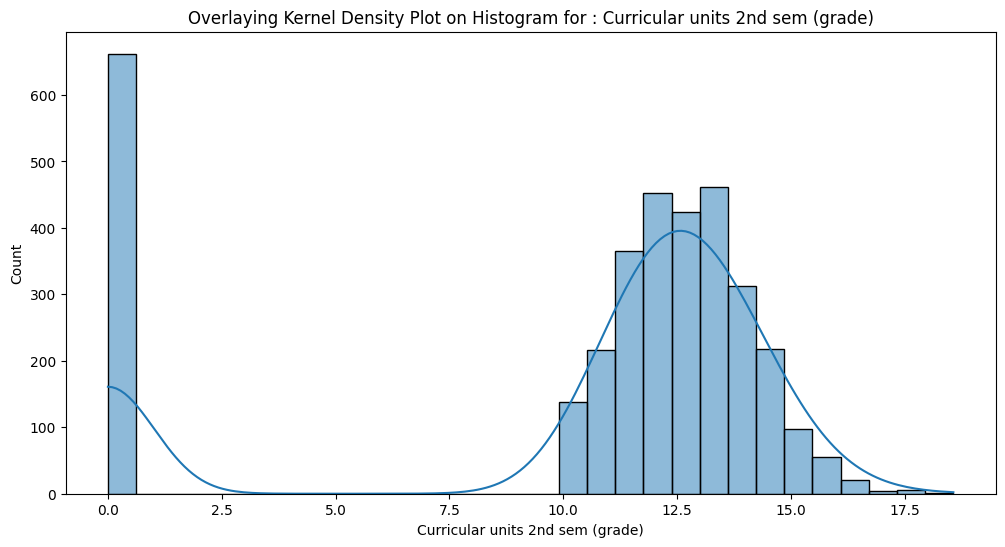

In [167]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Curricular units 2nd sem (grade)'], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Curricular units 2nd sem (grade)")
plt.show()

### **<font style="color:purple">Splitting Data</font>**

In [168]:
#Seperate Label and Features from df_train
Features = df_train.drop('Target', axis=1)
Label = df_train['Target']

In [169]:
#Split data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.2, random_state=42)

### **<font style="color:brown">Baseline : Dummy Classifier</font>**

In [170]:
#create a baseline model using DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [171]:
# Train Score
print(dummy_clf.score(X_train, y_train))

0.5187613843351548


In [172]:
# Test Score
print(dummy_clf.score(X_test, y_test))

0.4657933042212518


In [173]:
#make prediction on test data
y_pred = dummy_clf.predict(X_test)

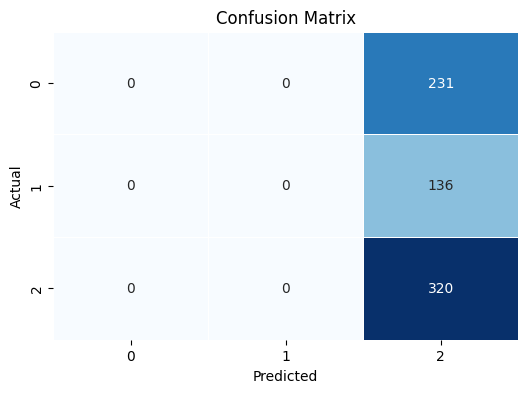

In [174]:
#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [175]:
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00       231
           1       1.00      0.00      0.00       136
           2       0.47      1.00      0.64       320

    accuracy                           0.47       687
   macro avg       0.82      0.33      0.21       687
weighted avg       0.75      0.47      0.30       687



### **<font style="color:brown">Logistic Regression</font>**

In [176]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression

# Apply logistic regression with a larger number of iterations
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [177]:
# Train Score
print(f"Training Score is :" ,log_reg.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,log_reg.score(X_test, y_test))

Training Score is : 0.7894353369763206
Testing Score is : 0.7481804949053857


In [178]:
#make prediction on test data
y_pred = log_reg.predict(X_test)

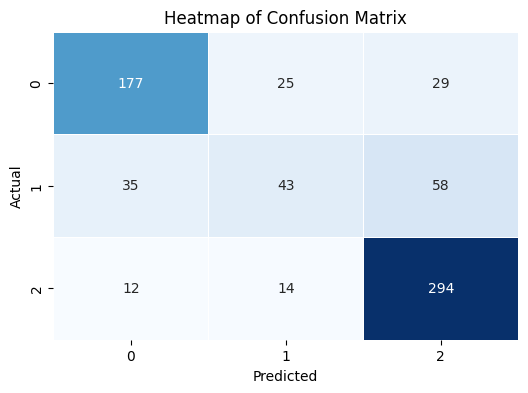

In [179]:
#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [180]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       231
           1       0.52      0.32      0.39       136
           2       0.77      0.92      0.84       320

    accuracy                           0.75       687
   macro avg       0.70      0.67      0.67       687
weighted avg       0.73      0.75      0.73       687



### **<font style="color:brown">SVC model</font>**

In [181]:
#create SVC model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [182]:
# Train Score
print(f"Training Score is :" ,svc.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,svc.score(X_test, y_test))


Training Score is : 0.6681238615664845
Testing Score is : 0.6302765647743813


In [183]:
#make prediction on test data
y_pred = dummy_clf.predict(X_test)


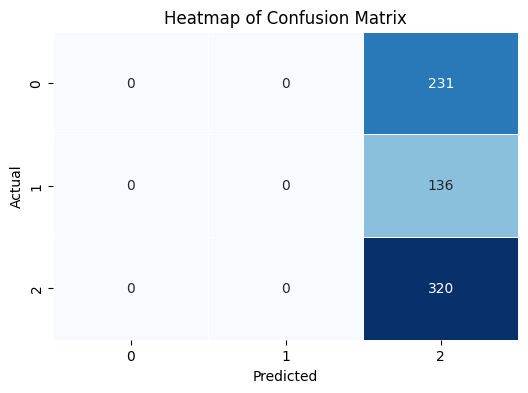

In [184]:
#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [185]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       231
           1       1.00      0.00      0.00       136
           2       0.47      1.00      0.64       320

    accuracy                           0.47       687
   macro avg       0.82      0.33      0.21       687
weighted avg       0.75      0.47      0.30       687



### **<font style="color:brown">K-Nearest Neighbor</font>**

In [186]:
#create KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [187]:
# Train Score
print(f"Training Score is :" ,knn.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,knn.score(X_test, y_test))



Training Score is : 0.7544626593806921
Testing Score is : 0.6157205240174672


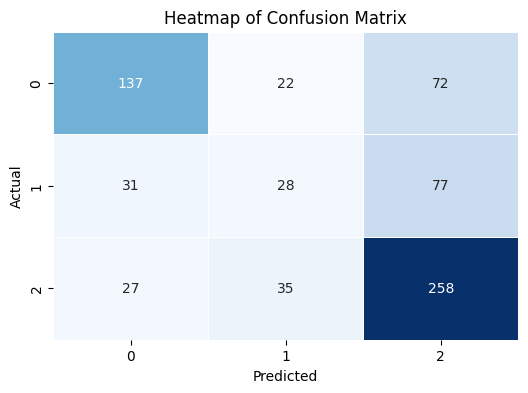

In [188]:
#make prediction on test data
y_pred = knn.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [189]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       231
           1       0.33      0.21      0.25       136
           2       0.63      0.81      0.71       320

    accuracy                           0.62       687
   macro avg       0.56      0.54      0.54       687
weighted avg       0.60      0.62      0.60       687



### **<font style="color:brown">Decision Tree Classifier</font>**

In [190]:
#create Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [191]:
# Train Score
print(f"Training Score is :" ,dtree.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,dtree.score(X_test, y_test))



Training Score is : 1.0
Testing Score is : 0.6724890829694323


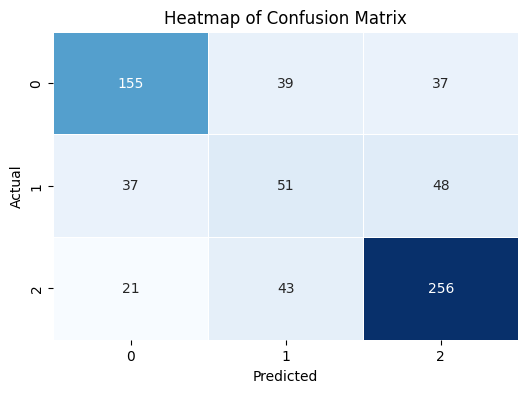

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       231
           1       0.38      0.38      0.38       136
           2       0.75      0.80      0.77       320

    accuracy                           0.67       687
   macro avg       0.62      0.62      0.62       687
weighted avg       0.67      0.67      0.67       687



In [192]:
#make prediction on test data
y_pred = dtree.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
    


### **<font style="color:brown">Random Forest Classifier</font>**

In [193]:
#create Random Forest model > one of ensemble method
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5000, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=42)

In [194]:
# Train Score
print(f"Training Score is :" ,rfc.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,rfc.score(X_test, y_test))

Training Score is : 1.0
Testing Score is : 0.7554585152838428


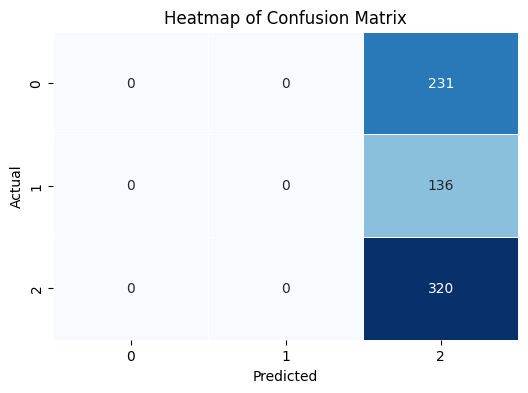

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       231
           1       1.00      0.00      0.00       136
           2       0.47      1.00      0.64       320

    accuracy                           0.47       687
   macro avg       0.82      0.33      0.21       687
weighted avg       0.75      0.47      0.30       687



In [195]:
#make prediction on test data
y_pred = dummy_clf.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


### **<font style="color:brown">XGBoost Classifier</font>**

In [196]:
#apply XGBoost model
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=5000, learning_rate=0.001, max_depth=7, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [197]:
# Train Score
print(f"Training Score is :" ,xgb.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,xgb.score(X_test, y_test))

Training Score is : 0.9489981785063752
Testing Score is : 0.7569141193595342


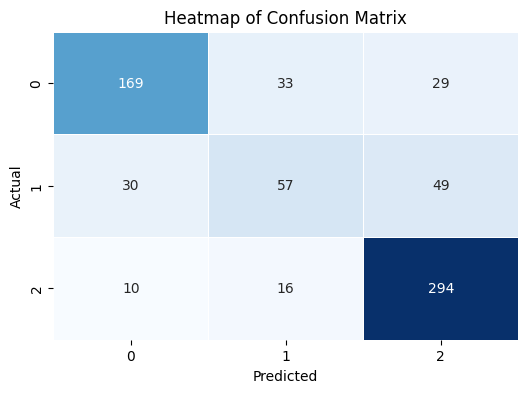

 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       231
           1       0.54      0.42      0.47       136
           2       0.79      0.92      0.85       320

    accuracy                           0.76       687
   macro avg       0.71      0.69      0.70       687
weighted avg       0.75      0.76      0.75       687



In [198]:
#make prediction on test data
y_pred = xgb.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


### **<font style="color:brown">Gradient Boosting</font>**

In [199]:
#create Gradient Boosting model > one of ensemble method
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.001, max_depth=7, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=7, n_estimators=5000,
                           random_state=42)

In [200]:
# Train Score
print(f"Training Score is :" ,gbc.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,gbc.score(X_test, y_test))



Training Score is : 0.9883424408014572
Testing Score is : 0.7510917030567685


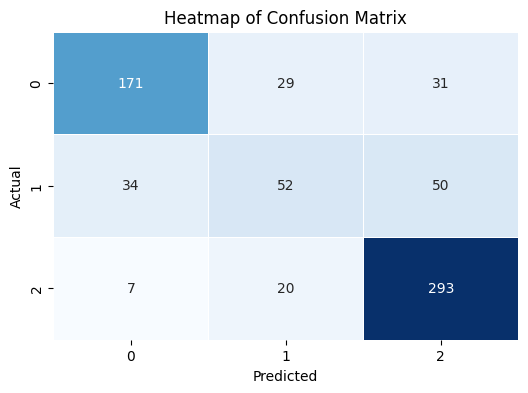

 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       231
           1       0.51      0.38      0.44       136
           2       0.78      0.92      0.84       320

    accuracy                           0.75       687
   macro avg       0.70      0.68      0.69       687
weighted avg       0.74      0.75      0.74       687



In [201]:
#make prediction on test data
y_pred = gbc.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


### **<font style="color:brown">AdaBoosting model</font>**

In [202]:
#create AdaBoost model > one of ensemble method
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5000, learning_rate=0.001, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=5000, random_state=42)

In [203]:
# Train Score
print(f"Training Score is :" ,ada.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,ada.score(X_test, y_test))



Training Score is : 0.7413479052823315
Testing Score is : 0.7132459970887919


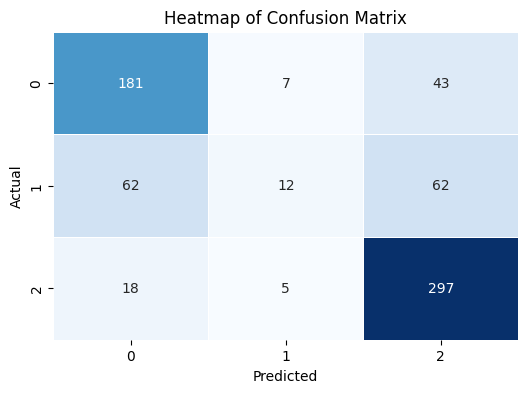

 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.74       231
           1       0.50      0.09      0.15       136
           2       0.74      0.93      0.82       320

    accuracy                           0.71       687
   macro avg       0.64      0.60      0.57       687
weighted avg       0.68      0.71      0.66       687



In [204]:
#make prediction on test data
y_pred = ada.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report 
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))